In [ ]:
# %matplotlib qt
import glob
import os
import functools

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

In [ ]:
df = pd.read_csv("propagated/ONEWEB-0395.csv")

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(df['x'], df['y'], df['z'])

time_text = ax.text2D(0, .1, 'hi!', fontsize=15)

fig.show()

In [ ]:
fig_anim = plt.figure()
# ax_anim = fig_anim.add_subplot(projection='3d', xlim=(df["x"].min(), df["x"].max()), ylim=(df["y"].min(), df["y"].max()), zlim=(df["z"].min(), df["z"].max()))
ax_anim = fig_anim.add_subplot(projection='3d')

cp = sns.color_palette("crest", as_cmap=True)

time_text = ax.text(.5, .5, 0, '', fontsize=15)

def animate(i, max_frames):
    # ax_anim.clear()
    time_text.set_text(f"t = df['date'][i]")
    ax_anim.scatter(df['x'][i], df['y'][i], df['z'][i], marker="x", color=cp(i/max_frames))

frames = 2800
# anim = animation.FuncAnimation(fig_anim, functools.partial(animate, max_frames=frames), frames=frames, interval=10, blit=False)
# anim.save('animation-395.mp4', progress_callback = lambda i, n: print(f'Saving frame {i} of {n}\n' if i % 10 == 0 else "", end=""), extra_args=['-vcodec', 'h264_videotoolbox']
# )

In [20]:
# get all the files in the propagated directory
files = glob.glob("propagated/STARLINK*.csv")

# make a dict of the files and the sat names
# sat_files = {int(os.path.basename(f).split(".")[0][len("ONEWEB-"):]): pd.read_csv(f) for f in files}
sat_files = {int(os.path.basename(f).split(".")[0][len("STARLINK-"):][:4]): pd.read_csv(f) for f in files}

In [ ]:
# plot everything in 3D for a specific time
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# for sat, df in sat_files.items():
    # ax.plot(df['x'], df['y'], df['z'], label=sat)

# ax.legend()
# fig.show()


In [ ]:
sat_files.keys()

In [ ]:
# now animate movement of each satellite
fig_anim = plt.figure()
ax_anim = fig_anim.add_subplot(projection='3d')

cp = sns.color_palette("crest", as_cmap=True)

time_text = ax_anim.text2D(0, .1, '', fontsize=15)

# only use every 100th frame

# start = 26000
start = 0
end = len(sat_files[395])

def animate(i, max_frames):
    i *= 100

    ax_anim.clear()
    time_text.set_text(f"t = {sat_files[395]['date'][i]}")

    for sat, df in sat_files.items():
        ax_anim.scatter(df['x'][i], df['y'][i], df['z'][i], marker="x", color=cp(i/max_frames))

frames = int((end - start) / 100)

anim = animation.FuncAnimation(fig_anim, functools.partial(animate, max_frames=frames), frames=frames, interval=10, blit=False)
anim.save("animation-oneweb.mp4", writer=animation.FFMpegWriter(fps=60, codec="h264_videotoolbox", bitrate=1000000))

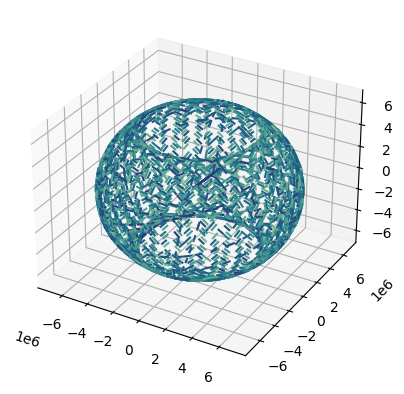

: 

In [23]:
# now animate movement of each satellite
fig_anim = plt.figure()
ax_anim = fig_anim.add_subplot(projection='3d')

cp = sns.color_palette("crest", as_cmap=True)

time_text = ax_anim.text2D(0, .1, '', fontsize=15)

# only use every 100th frame

# get any satellite
sat = list(sat_files.keys())[0]

# start = 26000
start = 0
# end = len(sat_files[395])
end = len(sat_files[sat])

max_sat = max(sat_files.keys())

step_size = 20

def animate(i, max_frames):
    i *= step_size

    ax_anim.clear()
    time_text.set_text(f"t = {sat_files[sat]['date'][i]}")

    for sat, df in sat_files.items():
        ax_anim.plot(df['x'][i:i+2], df['y'][i:i+2], df['z'][i:i+2], color=cp(sat/max_sat))

frames = int((end - start) / step_size)

anim = animation.FuncAnimation(fig_anim, functools.partial(animate, max_frames=frames), frames=frames, interval=10, blit=False)
anim.save("animation-starlink.mp4", writer=animation.FFMpegWriter(fps=24, codec="h264_videotoolbox", bitrate=1000000))